***
MNIST Model Creation
***

*By Jared Kelnhofer, 10-02-2020*

The purpose of this portion of the project is to create a model that can accurately categorize handwritten digits. This model will then be used in the main body of the project. I'll be using the MNIST handwritten digit dataset, and saving it in the /Dataset directory which is in the same directory as this notebook. TODO: add a way to load the local dataset instead of downloading it!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random

import os
if not os.path.exists('./Dataset'):
    os.makedirs('./Dataset')

from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, data_home="./Dataset")

Now I'll check out the MNIST dataset, and gain some insight on how it is structured:

In [2]:
print(mnist.keys())
print("Shape of \"data\" key: " + str(np.shape(mnist.data)))
print("Shape of \"target\" key: " + str(np.shape(mnist.target)))

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Shape of "data" key: (70000, 784)
Shape of "target" key: (70000,)


Sicne the square root of 784 is 28, I'm going to assume that the images are 28 by 28 pixels. I'm not sure why they're not stored in a 3d vector, but it doesn't really matter. Numpy has a function "reshape" that will let me change the shape of the 1D vector representing any image into a 28 by 28 matrix, and thus view it.

test_image default shape is: (784,)
test_image new shape is: (28, 28)


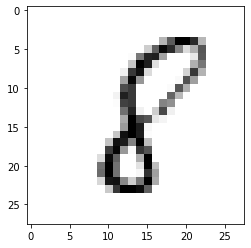

Label: 8
highest pixel value: 255.0
lowest pixel value: 0.0
First pixel amount: 0.0


In [3]:
index = random.randint(0, 70000)

test_image = mnist.data[index]
print("test_image default shape is: " + str(np.shape(test_image)))
test_image = test_image.reshape(28, 28)
print("test_image new shape is: " + str(np.shape(test_image)))


plt.imshow(test_image, cmap="binary")
plt.show()

print("Label: " + mnist.target[index])

print("highest pixel value: " + str(np.max(mnist.data[index])))
print("lowest pixel value: " + str(np.min(mnist.data[index])))
print("First pixel amount: " + str(mnist.data[index][0]))

Now it's time to split up the data into the training and test sets. MNIST has the last 10,000 images set aside as testing images, and the same goes for the target labels. MNIST comes pre-shuffled, so I don't have to worry about stratified splitting. (Note: we also know now that the images have 0 as the background and high values as the number.)

In [4]:
X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
Y_train = mnist.target[:60000]
Y_test = mnist.target[60000:]

print("X_train shape: " + str(np.shape(X_train)))
print("X_test shape: " + str(np.shape(X_test)))
print("Y_train shape: " + str(np.shape(Y_train)))
print("Y_test shape: " + str(np.shape(Y_test)))

X_train shape: (60000, 784)
X_test shape: (10000, 784)
Y_train shape: (60000,)
Y_test shape: (10000,)


Now all I need to do is create a model that can categorize the data with at least 97% accuracy, and test it to make sure I am not overfitting. Then I'll save the model, and move on to the rest of this project! This is where I'll add my hyperparameter tuning!

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Let's see how well that worked!

In [6]:
Y_predict = tree.predict(X_test)

Aight, let's see a confusion matrix that compares the actual labels of our test data to the model's predictions. While we're at it, let's check out the accuracy and loss of the model.

In [7]:
from sklearn.metrics import confusion_matrix
print("confusion matrix:")
print(confusion_matrix(Y_test, Y_predict))

print("accuracy:" + str(tree.score(X_test, Y_test)))

confusion matrix:
[[ 921    0   10    5    4   10   10    5    9    6]
 [   0 1086   14    7    3    2    4    4   14    1]
 [   7   12  885   33   14   11    9   28   24    9]
 [   9    7   30  871    6   39    2    6   21   19]
 [   4    4    8    7  869    8   16   10   17   39]
 [  14    9    3   43   13  747   25    3   20   15]
 [  18    4   14    6   19   22  836    3   31    5]
 [   2    9   22   20    9    7    2  930    7   20]
 [  15    8   31   34   18   25   17    9  785   32]
 [  17    4    6   20   41    8    4   24   28  857]]
accuracy:0.8787


That looks good enough! Now I'll save the model with pickle, and test re-loading it into the system. I'll also use the score() method to find out what my mean accuracy is on the image recognition.

In [8]:
this_files_directory = os.getcwd()
filename = this_files_directory + '/trained_tree.pickle'
pickle.dump(tree, open(filename, 'wb'))

print("saving model to: " + str(filename))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

print("loading model!")
print("mean accuracy: " + str(result))

saving model to: /home/admin/Desktop/DigitRecognizer/Dev/Model/trained_tree.pickle
loading model!
mean accuracy: 0.8787


Now that the model is saved, and I know I can load it, I'll move onto the other portion of this project -- the GUI.